In [34]:
import wave

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io.wavfile as wavfile
from scipy.fftpack import rfft, irfft, fftfreq, rfftfreq

%matplotlib inline

def high_pass_filter(freq, amp, min_freq):
    df = pd.DataFrame(amp, index=freq, columns=['Amplitude'])
    df = df.copy()
    df[df.index < min_freq] = 0
    return df

def low_pass_filter(freq, amp, max_freq):
    df = pd.DataFrame(amp, index=freq, columns=['Amplitude'])
    df = df.copy()
    df[df.index > max_freq] = 0
    return df

def band_pass_filter(freq, amp, min_freq, max_freq):
    df = pd.DataFrame(amp, index=freq, columns=['Amplitude'])
    df = df.copy()
    df[(df.index > max_freq) & (df.index < min_freq)] = 0
    return df

In [16]:
fs, aud = wavfile.read('video/audio_v83196893.wav')

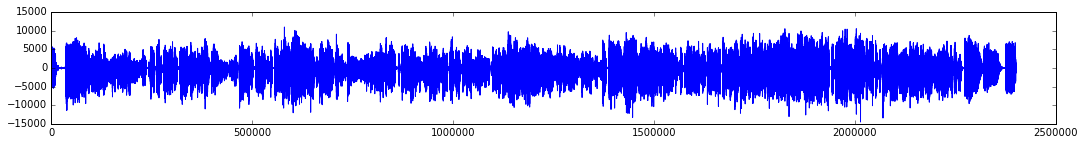

In [54]:
plt.figure(figsize=(18,2))
plt.plot(aud[10*60*fs:15*60*fs, 0])
plt.show()

In [ ]:
W = rfftfreq(len(aud[:,0]), d=8000)
f_signal = rfft(aud[:,0])
low_pass_filter(W, f_signal, 20)

In [17]:
sample_rate = 8000
interval = 1
chan = aud.mean(axis=1)
integral = []
for i in np.arange(0, 260954966, interval*sample_rate):
    section = chan[i:i+interval*sample_rate]
    integral.append(sum(abs(chan[i:i+interval*sample_rate])))

integral = [(v - min(integral))/max(integral) for v in integral]

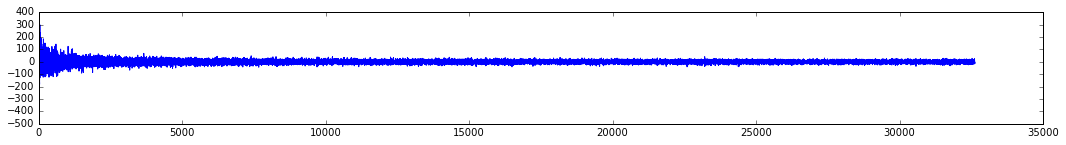

In [47]:
W = rfftfreq(len(integral), d=8000)
f_signal = rfft(integral)
plt.figure(figsize=(18,2))
plt.plot(f_signal[1:])
plt.show()

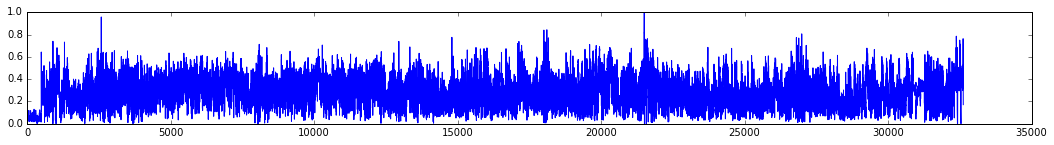

In [45]:
band = 0.02
min_band = 39
max_band = 40
filtered = irfft(band_pass_filter(W, f_signal, min_band, max_band)['Amplitude'], len(band_pass_filter(W, f_signal, min_band, max_band)['Amplitude']))

plt.figure(figsize=(18,2))
plt.plot(filtered)
plt.show()

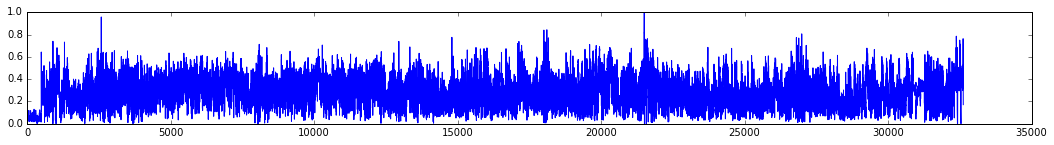

In [18]:
plt.figure(figsize=(18,2))
plt.plot(integral)
plt.show()

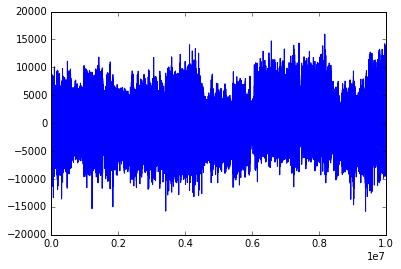

In [59]:
plt.figure(figsize=(19,2))
plt.plot(chan[10000000:20000000])
plt.show()

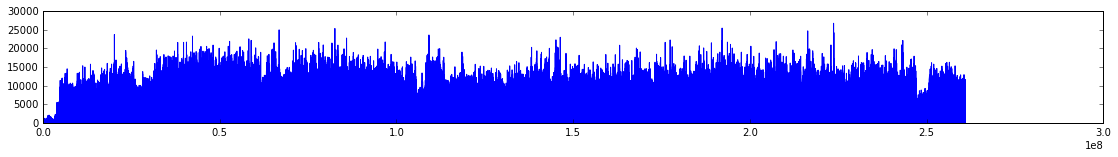

In [63]:
plt.figure(figsize=(19,2))
plt.plot(np.abs(chan))
plt.show()